Значит для проекта был выбран датасет с кагла на 10000 фильмов, что является настолько большим датасетом, что я не могу посмотреть его содержимое нигде кроме нотпада++, будем смотреть по ходу пьесы. Прочитаем файл с помощью пандас, потому что встроенные функции питона по работе с csv неэффективны. 
Отсюда же уберем столбцы видео (как я понимаю, это сериалы, а в датасете их нет), adult (все false), пути на картинки (нам они ни к чему), оригинальные названия тоже выпилим потому что азиатские языки нам не знакомы, анализировать овервью мы не собираемся. 

In [1]:
import pandas as pd

#df_ = pd.read_csv('CleanedTMDB1000.csv')
#df_.drop(labels=["video","adult","backdrop_path","poster_path", "original_title", "overview"],axis=1,inplace=True)
#df_
        

В этом датасете мы вырезаем слишком много всего, поэтому посмотрим другие датасеты такого же плана. Зтот датасет чуть постарее, но включает в себя больше полезных данных, с которыми мы можем поработать. А еще он весит в 56 раз меньше. Овервью мы впрочем дропнем все равно, лингвистический анализ это не то за чем мы сюда пришли. Столбец Unnmaed это просто номера строк, пандас их считает за нас, поэтому тоже дропнем их

In [2]:
import matplotlib.pyplot as plt
df = pd.read_csv('tmdb2.csv',engine='python')
df.drop(labels=["Unnamed: 0","overview"],axis=1,inplace=True)
df

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime,tagline
0,385687,Fast X,2023-05-17,"['Action', 'Crime', 'Thriller']",English,7.4,1347.0,8363.473,340000000.0,"['Universal Pictures', 'Original Film', 'One R...",6.520000e+08,142.0,The end of the road begins.
1,603692,John Wick: Chapter 4,2023-03-22,"['Action', 'Thriller', 'Crime']",English,7.9,2896.0,4210.313,90000000.0,"['Thunder Road', '87Eleven', 'Summit Entertain...",4.317692e+08,170.0,"No way back, one way out."
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Family', 'Adventure', 'Fantasy'...",English,7.8,4628.0,3394.458,100000000.0,"['Universal Pictures', 'Illumination', 'Ninten...",1.308767e+09,92.0,NaN
3,569094,Spider-Man: Across the Spider-Verse,2023-05-31,"['Action', 'Adventure', 'Animation', 'Science ...",English,8.8,1160.0,2859.047,100000000.0,"['Columbia Pictures', 'Sony Pictures Animation...",3.135222e+08,140.0,It's how you wear the mask that matters
4,536437,Hypnotic,2023-05-11,"['Mystery', 'Thriller', 'Science Fiction']",English,6.5,154.0,2654.854,70000000.0,"['Studio 8', 'Solstice Productions', 'Ingeniou...",0.000000e+00,94.0,Control is an illusion.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,33142,Vivah,2006-11-10,"['Romance', 'Drama']",Hindi,6.4,70.0,12.301,0.0,['Rajshri Productions'],4.000000e+06,175.0,Marriage isn't a game...
9997,9442,Dead Men Don't Wear Plaid,1982-05-21,"['Comedy', 'Mystery']",English,6.6,324.0,12.301,9000000.0,"['Universal Pictures', 'Aspen Film Society']",1.819617e+07,89.0,Laugh...or I’ll blow your lips off!
9998,28774,Communion,1989-11-10,"['Drama', 'Horror', 'Science Fiction', 'Thrill...",English,5.3,147.0,12.300,5000000.0,"['The Picture Property Company', 'Allied Visio...",1.919653e+06,103.0,The true story of one man's terrifying journey...
9999,11121,Tess,1979-10-06,"['Drama', 'Romance']",English,7.0,283.0,12.300,12000000.0,"['Renn Productions', 'Timothy Burrill Producti...",2.010125e+07,186.0,She was born into a world where they called it...


Что можно сделать со всем этим? 
- Посчитать рантайм. 
- посчитать vote count. 
- budget and revenue -- most revenue for lovest budget and vise versa? Surely correlation between budget and revenue. 
- Genre histogram. 
- киностудии. 
- Топ-10 самых богатых на фильмы годов, график количества фильмов, средняя оценка фильмов за год. 
- Средняя оценка по жанрам. 
- Среднее ревеню\бюджет по жанрам. 

Совсем безумно: натренировать модель которой можно будет указать жанр, бюджет и рантайм и поулчить предсказание по ревеню и популярности.

Начнем с простого: пройдемся по отдельным столбцам, посмотрим что есть там
# Продолжительность

Самый длинный фильм в датасете - The Best of Youth идущий 366.0
Самый короткий фильм в датасете - Spider-Man: Beyond the Spider-Verse идущий 0.0
Средняя продолжительность фильма - 100.80958095809581, медианная - 100.0


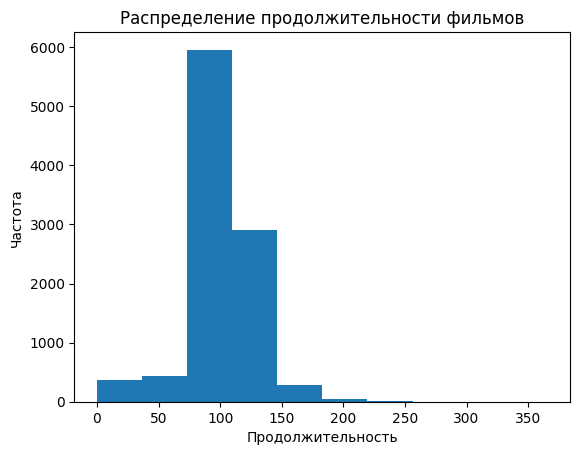

In [3]:
longest_runtime_name = df.loc[df['runtime'].idxmax(), 'title']
longest_runtime_value = df.loc[df['runtime'].idxmax(), 'runtime']
shortest_runtime_name = df.loc[df['runtime'].idxmin(), 'title']
shortest_runtime_value = df.loc[df['runtime'].idxmin(),'runtime']
mean_runtime = df['runtime'].mean()
median_runtime = df['runtime'].median()
print(f'Самый длинный фильм в датасете - {longest_runtime_name} идущий {longest_runtime_value}')
print(f'Самый короткий фильм в датасете - {shortest_runtime_name} идущий {shortest_runtime_value}')
print(f'Средняя продолжительность фильма - {mean_runtime}, медианная - {median_runtime}')
plt.hist(df['runtime'])
plt.xlabel('Продолжительность')
plt.ylabel('Частота')
plt.title('Распределение продолжительности фильмов')
plt.show()

Что? Самый короткий фильм идет 0 минут? Отсортируем датафрейм по продолжительности и посмотрим что это такое

In [4]:
df

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime,tagline
0,385687,Fast X,2023-05-17,"['Action', 'Crime', 'Thriller']",English,7.4,1347.0,8363.473,340000000.0,"['Universal Pictures', 'Original Film', 'One R...",6.520000e+08,142.0,The end of the road begins.
1,603692,John Wick: Chapter 4,2023-03-22,"['Action', 'Thriller', 'Crime']",English,7.9,2896.0,4210.313,90000000.0,"['Thunder Road', '87Eleven', 'Summit Entertain...",4.317692e+08,170.0,"No way back, one way out."
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Family', 'Adventure', 'Fantasy'...",English,7.8,4628.0,3394.458,100000000.0,"['Universal Pictures', 'Illumination', 'Ninten...",1.308767e+09,92.0,NaN
3,569094,Spider-Man: Across the Spider-Verse,2023-05-31,"['Action', 'Adventure', 'Animation', 'Science ...",English,8.8,1160.0,2859.047,100000000.0,"['Columbia Pictures', 'Sony Pictures Animation...",3.135222e+08,140.0,It's how you wear the mask that matters
4,536437,Hypnotic,2023-05-11,"['Mystery', 'Thriller', 'Science Fiction']",English,6.5,154.0,2654.854,70000000.0,"['Studio 8', 'Solstice Productions', 'Ingeniou...",0.000000e+00,94.0,Control is an illusion.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,33142,Vivah,2006-11-10,"['Romance', 'Drama']",Hindi,6.4,70.0,12.301,0.0,['Rajshri Productions'],4.000000e+06,175.0,Marriage isn't a game...
9997,9442,Dead Men Don't Wear Plaid,1982-05-21,"['Comedy', 'Mystery']",English,6.6,324.0,12.301,9000000.0,"['Universal Pictures', 'Aspen Film Society']",1.819617e+07,89.0,Laugh...or I’ll blow your lips off!
9998,28774,Communion,1989-11-10,"['Drama', 'Horror', 'Science Fiction', 'Thrill...",English,5.3,147.0,12.300,5000000.0,"['The Picture Property Company', 'Allied Visio...",1.919653e+06,103.0,The true story of one man's terrifying journey...
9999,11121,Tess,1979-10-06,"['Drama', 'Romance']",English,7.0,283.0,12.300,12000000.0,"['Renn Productions', 'Timothy Burrill Producti...",2.010125e+07,186.0,She was born into a world where they called it...


Внезапно, в нашем датасете есть фильмы, которые еще не вышли, есть даже пятый аватар, которому выходить аж через пять лет. Не очень понятно, что эти фильмы делают в датасете, поэтому от них мы избавимся. Вместе с этим избавимся от фильмов у которых нет оценок, потому что они будут только отравлять выборку. После чего пройдемся по продолжительности еще раз.

In [5]:
df_ = df 
df.drop(df[df['runtime'] == 0].index, inplace=True)
df.drop(df[df['vote_count'] == 0].index, inplace=True)
df.drop(df[df['id'] == 0].index, inplace=True)#есть какой-то непонятный фильм с нулевым айди и NaN полями, его тоже уберем
df

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime,tagline
0,385687,Fast X,2023-05-17,"['Action', 'Crime', 'Thriller']",English,7.4,1347.0,8363.473,340000000.0,"['Universal Pictures', 'Original Film', 'One R...",6.520000e+08,142.0,The end of the road begins.
1,603692,John Wick: Chapter 4,2023-03-22,"['Action', 'Thriller', 'Crime']",English,7.9,2896.0,4210.313,90000000.0,"['Thunder Road', '87Eleven', 'Summit Entertain...",4.317692e+08,170.0,"No way back, one way out."
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Family', 'Adventure', 'Fantasy'...",English,7.8,4628.0,3394.458,100000000.0,"['Universal Pictures', 'Illumination', 'Ninten...",1.308767e+09,92.0,NaN
3,569094,Spider-Man: Across the Spider-Verse,2023-05-31,"['Action', 'Adventure', 'Animation', 'Science ...",English,8.8,1160.0,2859.047,100000000.0,"['Columbia Pictures', 'Sony Pictures Animation...",3.135222e+08,140.0,It's how you wear the mask that matters
4,536437,Hypnotic,2023-05-11,"['Mystery', 'Thriller', 'Science Fiction']",English,6.5,154.0,2654.854,70000000.0,"['Studio 8', 'Solstice Productions', 'Ingeniou...",0.000000e+00,94.0,Control is an illusion.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,33142,Vivah,2006-11-10,"['Romance', 'Drama']",Hindi,6.4,70.0,12.301,0.0,['Rajshri Productions'],4.000000e+06,175.0,Marriage isn't a game...
9997,9442,Dead Men Don't Wear Plaid,1982-05-21,"['Comedy', 'Mystery']",English,6.6,324.0,12.301,9000000.0,"['Universal Pictures', 'Aspen Film Society']",1.819617e+07,89.0,Laugh...or I’ll blow your lips off!
9998,28774,Communion,1989-11-10,"['Drama', 'Horror', 'Science Fiction', 'Thrill...",English,5.3,147.0,12.300,5000000.0,"['The Picture Property Company', 'Allied Visio...",1.919653e+06,103.0,The true story of one man's terrifying journey...
9999,11121,Tess,1979-10-06,"['Drama', 'Romance']",English,7.0,283.0,12.300,12000000.0,"['Renn Productions', 'Timothy Burrill Producti...",2.010125e+07,186.0,She was born into a world where they called it...


Самый длинный фильм в датасете - The Best of Youth идущий 366.0
Самый короткий фильм в датасете - Cross Road идущий 2.0
Средняя продолжительность фильма - 102.98714493054116, медианная - 101.0


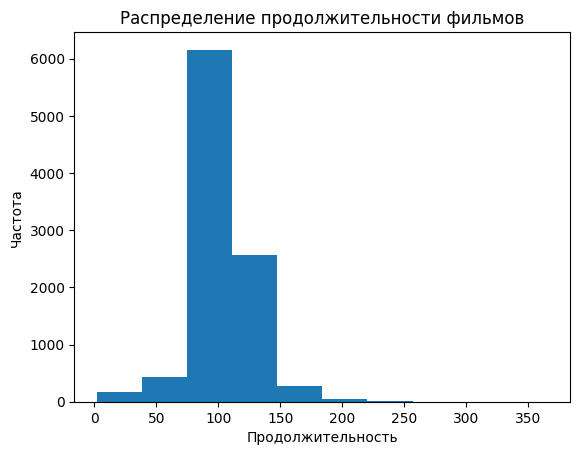

In [6]:
longest_runtime_name = df.loc[df['runtime'].idxmax(), 'title']
longest_runtime_value = df.loc[df['runtime'].idxmax(), 'runtime']
shortest_runtime_name = df.loc[df['runtime'].idxmin(), 'title']
shortest_runtime_value = df.loc[df['runtime'].idxmin(),'runtime']
mean_runtime = df['runtime'].mean()
median_runtime = df['runtime'].median()
print(f'Самый длинный фильм в датасете - {longest_runtime_name} идущий {longest_runtime_value}')
print(f'Самый короткий фильм в датасете - {shortest_runtime_name} идущий {shortest_runtime_value}')
print(f'Средняя продолжительность фильма - {mean_runtime}, медианная - {median_runtime}')
plt.hist(df['runtime'])
plt.xlabel('Продолжительность')
plt.ylabel('Частота')
plt.title('Распределение продолжительности фильмов')
plt.show()

# Оценки
Теперь посмотрим количество оценок, сами оценки, и сразу же попробуем померять их корреляцию (она маленькая). Первый раз, когда у нас расходится среднее и медиана!

Самый многооцененный фильм в датасете - Inception с 33822.0 оценок
Среднее кол-во оценок фильма - 1615.2113610448844, медианное - 564.0


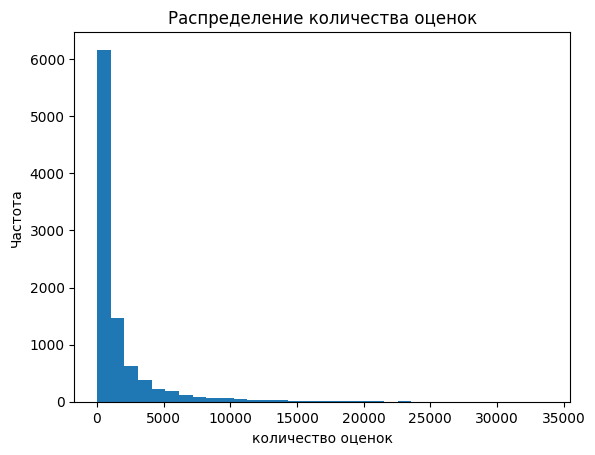

Самый высокооценный фильм в датасете - BTS: Permission to Dance on Stage - LA с оценкой 9.1
Самый низкооценный фильм в датасете - Animal Instincts II c оценокй 2.6
Среднее кол-во оценок фильма - 6.587299509001635, медианное - 6.6


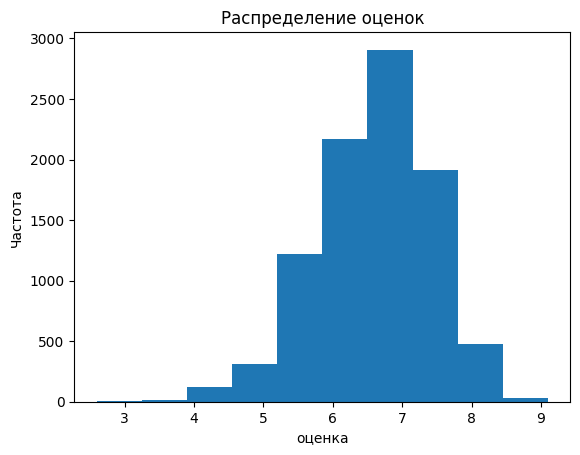

Корреляция между средней оценкой и их количеством составляет 0.28


In [7]:
df_vote = df

highest_votecount_name = df.loc[df['vote_count'].idxmax(), 'title']
highest_votecount_value = df.loc[df['vote_count'].idxmax(), 'vote_count']
mean_votecount = df['vote_count'].mean()
median_votecount = df['vote_count'].median()
print(f'Самый многооцененный фильм в датасете - {highest_votecount_name} с {highest_votecount_value} оценок')
print(f'Среднее кол-во оценок фильма - {mean_votecount}, медианное - {median_votecount}')
plt.hist(df['vote_count'],bins=33)
plt.xlabel('количество оценок')
plt.ylabel('Частота')
plt.title('Распределение количества оценок')
plt.show()

df.drop(df[df['vote_count'] < 10].index, inplace=True)#отбросим фильмы у которых меньше 10 оценок
highest_vote_name = df.loc[df['vote_average'].idxmax(), 'title']
highest_vote_value = df.loc[df['vote_average'].idxmax(), 'vote_average']
lowest_vote_name = df.loc[df['vote_average'].idxmin(), 'title']
lowest_vote_value = df.loc[df['vote_average'].idxmin(),'vote_average']
mean_vote = df['vote_average'].mean()
median_vote = df['vote_average'].median()
print(f'Самый высокооценный фильм в датасете - {highest_vote_name} с оценкой {highest_vote_value}')
print(f'Самый низкооценный фильм в датасете - {lowest_vote_name} c оценокй {lowest_vote_value}')
print(f'Среднее кол-во оценок фильма - {mean_vote}, медианное - {median_vote}')
plt.hist(df['vote_average'])
plt.xlabel('оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок')
plt.show()

correlation = df['vote_average'].corr(df['vote_count'])
print(f"Корреляция между средней оценкой и их количеством составляет {round(correlation, 2)}")
df = df_vote

# Бюджеты, выручка и их отношения
Здесь у нас во второй раз заметно расходятся медиана и среднее, так как последнее вытягиывается вверх благодаря ~диснеевским поделкам с раздутым из-за CGI бюджетом~ блокбастерам вроде Аватара

Самый большой бюджет у Avatar: The Way of Water -- 460000000.0
Самый маленький бюджет у Sex and Death 101 -- 5.0
Средний бюджет -- 40057738.46875, медианный -- 25000000.0


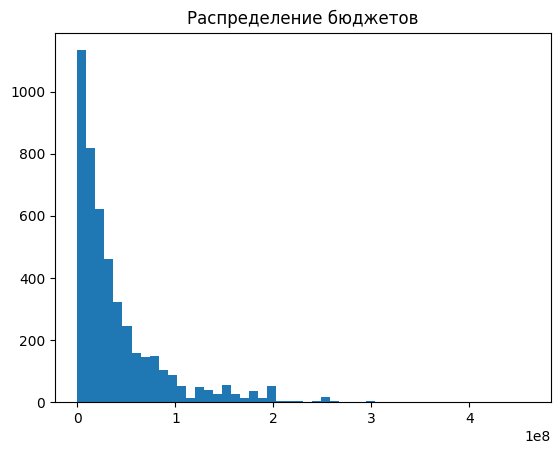

Самая большой выручка у Avatar -- 2923706026.0
Самая маленькая выручка у 1.0 -- Sex and Death 101
Средняя выручка -- 126545845.82726884, медианный -- 56085216.5


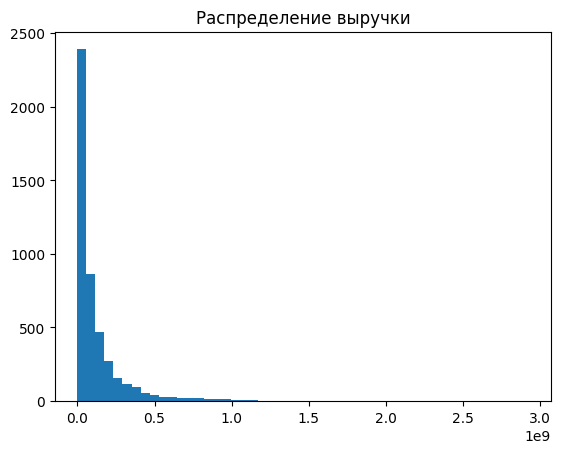

In [8]:
dfm = df
dfm.drop(dfm[dfm['budget'] < 1].index, inplace=True) #уберем фильмы у которых нет данных по бюджету и выручке
dfm.drop(dfm[dfm['revenue'] < 1].index, inplace=True)

most_budget_name = dfm.loc[dfm['budget'].idxmax(), 'title']
most_budget_value = dfm.loc[dfm['budget'].idxmax(), 'budget']
least_budget_name = dfm.loc[dfm['budget'].idxmin(), 'title']
least_budget_value = dfm.loc[dfm['budget'].idxmin(), 'budget']
mean_budget = dfm['budget'].mean()
median_budget = dfm['budget'].median()
print(f'Самый большой бюджет у {most_budget_name} -- {most_budget_value}')
print(f'Самый маленький бюджет у {least_budget_name} -- {least_budget_value}')
print(f'Средний бюджет -- {mean_budget}, медианный -- {median_budget}')
plt.hist(dfm['budget'], bins=50)
plt.title('Распределение бюджетов')
plt.show()

most_revenue_name = dfm.loc[dfm['revenue'].idxmax(), 'title']
most_revenue_value = dfm.loc[dfm['revenue'].idxmax(), 'revenue']
least_revenue_name = dfm.loc[dfm['revenue'].idxmin(), 'title']
least_revenue_value = dfm.loc[dfm['revenue'].idxmin(), 'revenue']
mean_revenue = dfm['revenue'].mean()
median_revenue = dfm['revenue'].median()
print(f'Самая большой выручка у {most_revenue_name} -- {most_revenue_value}')
print(f'Самая маленькая выручка у {least_revenue_value} -- {least_revenue_name}')
print(f'Средняя выручка -- {mean_revenue}, медианный -- {median_revenue}')
plt.hist(dfm['revenue'], bins=50)
plt.title('Распределение выручки')
plt.show()

Посчитаем корреляцию и отношения выручки к бюджету, и добавим это отношение в датафрейм

In [9]:
correl = dfm['budget'].corr(dfm['revenue'])
print(f"Корреляция между выручкой и бюджетом составляет {round(correl, 2)}")

best_revenue_to_budget_name = ''
best_revenue_to_budget_value = 0
best_revenue_to_budget_revenue = 0
best_revenue_to_budget_budget = 0
worst_revenue_to_budget_name = '????'
worst_revenue_to_budget_value = 1000
worst_revenue_to_budget_revenue = 0
worst_revenue_to_budget_budget = 0
ratio_sum = 0
q = 0
ratio_list = []
for index,row in dfm.iterrows():
    q+=1
    ratio = row['revenue']/row['budget']
    ratio_list.append(ratio)
    ratio_sum+=ratio
    if ratio > best_revenue_to_budget_value:
        best_revenue_to_budget_name = row['title']
        best_revenue_to_budget_value = ratio
        best_revenue_to_budget_revenue, best_revenue_to_budget_budget = row['revenue'], row['budget']
    if ratio < worst_revenue_to_budget_value:
        worst_revenue_to_budget_name = row['title']
        worst_revenue_to_budget_value = ratio
        worst_revenue_to_budget_revenue, worst_revenue_to_budget_budget = row['revenue'], row['budget']
print(f'Лучшее отношение у {best_revenue_to_budget_name} -- {best_revenue_to_budget_value}, при бюджете {best_revenue_to_budget_budget} и выручке {best_revenue_to_budget_revenue}')
print(f'Худшее отношение у {worst_revenue_to_budget_name} -- {worst_revenue_to_budget_value}, при бюджете {worst_revenue_to_budget_budget} и выручке {worst_revenue_to_budget_revenue}')
print(f"Среднее отношение выручки к бюджету -- {ratio_sum/q}")

correl = dfm['budget'].corr(dfm['vote_average'])
print(f"Корреляция между бюджетом и оценкой составляет {round(correl, 2)}")
correl = dfm['revenue'].corr(dfm['vote_average'])
print(f"Корреляция между выручкой и оценкой составляет {round(correl, 2)}")

dfm = dfm.assign(ratio=ratio_list)

Корреляция между выручкой и бюджетом составляет 0.72
Лучшее отношение у The Notorious Bettie Page -- 15675.31111111111, при бюджете 90.0 и выручке 1410778.0
Худшее отношение у Cross of Iron -- 3.35e-05, при бюджете 6000000.0 и выручке 201.0
Среднее отношение выручки к бюджету -- 9.607056526719202
Корреляция между бюджетом и оценкой составляет -0.01
Корреляция между выручкой и оценкой составляет 0.17


# Жанры и самые выгодные из них
Тут я подумал что explode() не работает, однако ручной проход по табличке показал что таки работает, все что единичный жанр есть популярная пара жанров. Было бы неплохо сделать корреляцию между жанрами и оценками/сборами, но надо понять как преобразовать списки жанров во что-то с чем может работать корреляция.

Value_counts можно нормализовать, и тогда мы получим проценты от всего датасета
['Drama']                 0.044092
['Comedy']                0.040454
['Comedy', 'Romance']     0.025043
['Drama', 'Romance']      0.022260
['Horror', 'Thriller']    0.019692


Топ-5 жанров  genres
['Drama']                                     206
['Comedy']                                    189
['Comedy', 'Romance']                         117
['Drama', 'Romance']                          104
['Horror', 'Thriller']                         92
['Horror']                                     72
['Comedy', 'Drama', 'Romance']                 70
['Comedy', 'Drama']                            61
['Action', 'Thriller']                         57
['Drama', 'History']                           52
['Action', 'Crime', 'Thriller']                50
['Crime', 'Drama', 'Thriller']                 46
['Action', 'Adventure', 'Science Fiction']     46
['Drama', 'Thriller']                          43
['Horror', 'Mystery', 'Thriller']              42
['Comedy', 'Crime']                            36
['Crime', 'Drama']                             34
['Action', 'Thriller', 'Crime']                32
['Drama', 'Comedy']                            31
['Horror', 'Mystery']        

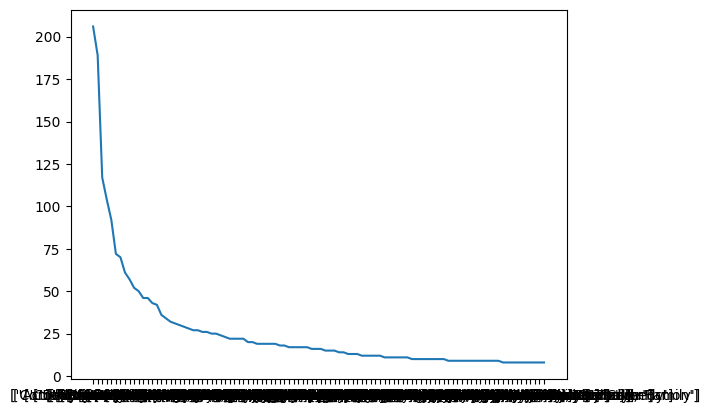

In [25]:
genre_count = df['genres'].explode().value_counts(normalize=False).explode()
most_common_genre = genre_count.idxmax()
most_common_genre = most_common_genre.strip("['']")
print('Топ-5 жанров ',genre_count.head(20))
plt.plot(genre_count.head(100))
plt.show()

Интересно будет посчитать, какие жанры будут давать максимум денег при минимуме вложений

In [11]:
genre_money = dfm.groupby('genres')[['revenue','budget']].mean()
genre_money['revenue_to_budget'] = genre_money['revenue']/genre_money['budget']
print(genre_money.sort_values(by='revenue_to_budget',ascending=False).head(5))
print('\n###СВЕРХУ МАКСИМУМ СНИЗУ МИНИМУМ\n')
print(genre_money.sort_values(by='revenue_to_budget',ascending=False).tail(5))

                                                        revenue     budget  \
genres                                                                       
['Action', 'Science Fiction', 'Animation']          125002821.0  1000000.0   
['Drama', 'War', 'Romance']                         402352579.0  4000000.0   
['Comedy', 'Science Fiction', 'Fantasy', 'Horror']  112892319.0  1200000.0   
['Family', 'Fantasy', 'Animation', 'Romance']       263591415.0  2900000.0   
['Horror', 'Mystery', 'Crime']                      103911669.0  1200000.0   

                                                    revenue_to_budget  
genres                                                                 
['Action', 'Science Fiction', 'Animation']                 125.002821  
['Drama', 'War', 'Romance']                                100.588145  
['Comedy', 'Science Fiction', 'Fantasy', 'Horror']          94.076932  
['Family', 'Fantasy', 'Animation', 'Romance']               90.893591  
['Horror', 'Mystery',

# Киностудии
Тут тоже хочется померять корреляцию

In [12]:
studious = df['production_companies'].explode().value_counts()
top_studio = studious.idxmax()
top_studio = top_studio.strip("['']")
print(studious.head(5))

production_companies
['Paramount']                51
['Warner Bros. Pictures']    34
['20th Century Fox']         29
['Columbia Pictures']        28
['Universal Pictures']       27
Name: count, dtype: int64


# Тренд даты и выручки 

Самые прибыльные года
year
1920    8.811000e+03
1927    6.504220e+05
1926    1.000000e+06
1936    1.800000e+06
1921    2.500000e+06
            ...     
2015    2.672605e+10
2018    2.791360e+10
2019    2.844980e+10
2016    2.920188e+10
2017    2.936336e+10
Name: revenue, Length: 99, dtype: float64


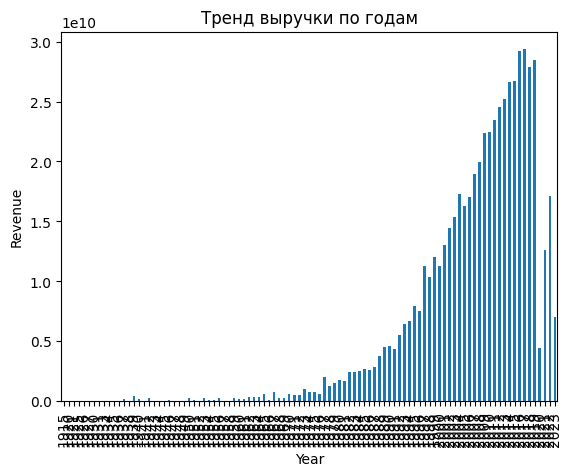

Года с самыми дорогими фильмами
year
1920    1.800000e+04
1915    1.000000e+05
1921    2.500000e+05
1934    3.250000e+05
1947    6.300000e+05
            ...     
2017    7.750803e+09
2011    7.777275e+09
2014    7.790222e+09
2013    8.127575e+09
2016    9.138124e+09
Name: budget, Length: 99, dtype: float64


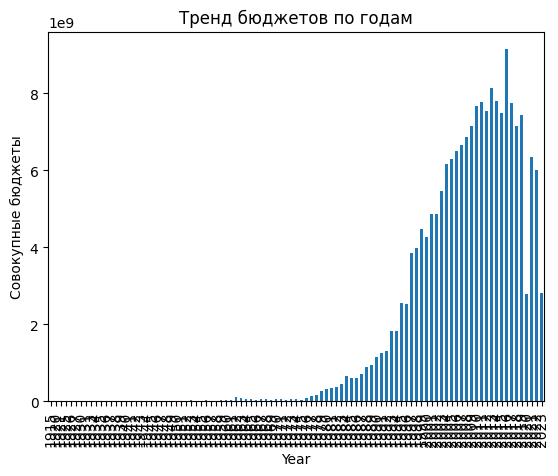

0.9832942152970167


In [13]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year
df_rev = df.groupby('year')['revenue'].sum()
df_rev.plot(kind='bar')
print('Самые прибыльные года')
print(df_rev.sort_values())
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title("Тренд выручки по годам")
plt.show()

df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year
df_bud = df.groupby('year')['budget'].sum()
df_bud.plot(kind='bar')
print('Года с самыми дорогими фильмами')
print(df_bud.sort_values())
plt.xlabel('Year')
plt.ylabel('Совокупные бюджеты')
plt.title("Тренд бюджетов по годам")
plt.show()

corr = df_rev.corr(df_bud)
print(corr)

# Влияние языка, бюджета и жанра на популярность

R-square значение оказывается достаточно высоким - 0.197, гораздо выше чем если мы уберем за скобки жанр (там где-то 0.04)

In [14]:
import statsmodels.api as sm
df_encoded = pd.get_dummies(df,columns=['original_language','genres'])
X = df_encoded.drop(['popularity','title','release_date','production_companies','tagline','id','vote_average','vote_count','revenue'],axis=1)
Y = df_encoded['popularity']
X = sm.add_constant(X)
model = sm.OLS(Y,X.astype(float)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                 -0.134
Method:                 Least Squares   F-statistic:                    0.5951
Date:                Fri, 22 Dec 2023   Prob (F-statistic):               1.00
Time:                        22:36:20   Log-Likelihood:                -30055.
No. Observations:                4672   AIC:                         6.283e+04
Df Residuals:                    3310   BIC:                         7.162e+04
Df Model:                        1361                                         
Covariance Type:            nonrobust                                         
                                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

# Тоже самое, но для выручки
Для выручки влияние еще больше -- 0.686 против 0.197

In [15]:
X2 = df_encoded.drop(['popularity','title','release_date','production_companies','tagline','id','vote_average','vote_count','revenue'],axis=1)
Y2 = df_encoded['revenue']
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y2,X2.astype(float)).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     5.324
Date:                Fri, 22 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:36:25   Log-Likelihood:                -93391.
No. Observations:                4672   AIC:                         1.895e+05
Df Residuals:                    3310   BIC:                         1.983e+05
Df Model:                        1361                                         
Covariance Type:            nonrobust                                         
                                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------